In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import parser 
import reverser

In [2]:
# cuts = [1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]
# parser.cutting_routine(cuts)
# reverser.reverser_routine(cuts)

In [3]:
# Path to your file
file_path = "decays_PDG2016Plus_massorder_original.dat"
# file_path = "decays_QM2016Plus_massorder.dat"

# Parse the file
particles_df, decays_df = parser.parse_to_df(file_path)

stable_particles_test = particles_df[particles_df["Width (GeV)"] == 0.0]
stable_particles = stable_particles_test[stable_particles_test["No. of decay channels"] == 1]["ID"].tolist()
print(f"Number of stable particles: {len(stable_particles)}")
print(f"Stable particles IDs: {stable_particles}")

Number of stable particles: 26
Stable particles IDs: [3334, -3334, 3312, -3312, 3322, -3322, 3112, -3112, 3212, -3212, 3222, -3222, 3122, -3122, 2112, -2112, 2212, -2212, 311, -311, 321, -321, 211, -211, 111, 22]


In [4]:
# View the data
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set display width
pd.set_option("display.max_colwidth", None)  # Set max column width

print("Particles DataFrame:")
print(particles_df.head(n=3))
print()
print(f"total number of particles : {len(particles_df)}")

print("\nDecays DataFrame:")
print(decays_df.head(n=3))
print()
print(f"total number of decays : {len(decays_df)}")


Particles DataFrame:
        ID          Name  Mass (GeV)  Width (GeV)  Degeneracy  Baryon no.  Strangeness no.  Charm no.  Bottom no.  Isospin  Charge  No. of decay channels
0  2001034  Delta(2950)-        2.95          0.5          16           1                0          0           0      1.5      -1                      2
1  2001033  Delta(2950)0        2.95          0.5          16           1                0          0           0      1.5       0                      3
2  2001032  Delta(2950)+        2.95          0.5          16           1                0          0           0      1.5       1                      3

total number of particles : 739

Decays DataFrame:
   ParentID  No. of daughter particles  BranchingRatio              ProductIDs
0   2001034                          2            0.96  [2001030, 22, 0, 0, 0]
1   2001034                          2            0.04   [2112, -211, 0, 0, 0]
2   2001033                          2            0.96  [2001029, 22, 0, 0

## TEST of dpg API

In [5]:
import pdg
from pdg_lib import *
#api = pdg.connect('sqlite:///Database/pdg-2025-v0.2.1.sqlite')
api = pdg.connect()
print(api)
print(type(api))

2025 Review of Particle Physics, data release 2025-05-30 13:30:23 PDT, API version 0.2.0
S. Navas et al. (Particle Data Group), Phys. Rev. D 110, 030001 (2024) and 2025 update
(C) Particle Data Group (PDG), data released under CC BY 4.0
For further information see https://pdg.lbl.gov/api
<class 'pdg.api.PdgApi'>


In [6]:
particle = api.get_particle_by_mcid(211)  # Example: get the particle with ID 211 (pi+)
mass = list(particle.masses())[0]
#width = list(particle.widths())[0]
lifetime = list(particle.lifetimes())[0]

svm = mass.summary_values()
print(svm)
print(svm[0].get_error_positive(units="GeV"))

svl = lifetime.summary_values()
print("lifetime: ",svl[0].get_value(units="s"))
print("lifetime error: ",svl[0].get_error_positive(units="s"))

print("width: ",(6.5*10**-25) / svl[0].get_value(units="s"))
print("width error: ",((6.5*10**-25) / (svl[0].get_value(units="s")**2)) * svl[0].get_error_positive(units="s"))
#print((6.5*10**-25) / svl[0].get_error_positive(units="s"))

print("particle width: ", particle.width)
print("particle width error: ", particle.width_error)


[{'id': 315210, 'pdgid_id': 2424, 'pdgid': 'S008M', 'edition': '2025', 'value_type': 'FC', 'in_summary_table': True, 'confidence_level': None, 'limit_type': None, 'comment': None, 'value': 139.570390983681, 'value_text': '139.57039+-0.00018', 'error_positive': 0.00018200716040826, 'error_negative': 0.00018200716040826, 'scale_factor': 1.76094, 'unit_text': 'MeV', 'display_value_text': '139.57039+-0.00018', 'display_power_of_ten': 0, 'display_in_percent': False, 'sort': 1, 'description': 'pi+- MASS'}, {'id': 315211, 'pdgid_id': 2424, 'pdgid': 'S008M', 'edition': '2025', 'value_type': 'AC', 'in_summary_table': False, 'confidence_level': None, 'limit_type': None, 'comment': None, 'value': 139.570390983681, 'value_text': '139.57039+-0.00017', 'error_positive': 0.000169358969894129, 'error_negative': 0.000169358969894129, 'scale_factor': 1.638568, 'unit_text': 'MeV', 'display_value_text': '139.57039+-0.00017', 'display_power_of_ten': 0, 'display_in_percent': False, 'sort': 2, 'description':

In [7]:
particle = api.get_particle_by_mcid(1114)  # Example: get the particle with ID 211 (pi+)
mass = list(particle.masses())[0]
width = list(particle.widths())[0]
#lifetime = list(particle.lifetimes())[0]

svm = mass.summary_values()
#print(svm)
print("mass error: ",svm[0].get_error_positive(units="GeV"))

svw = width.summary_values()
print(svw)
text = svw[0].value_text
print("width: ",text)
d_text = svw[0].display_value_text
print("display width: ",d_text)
unit = svw[0].units
print("unit: ",unit)

import re

test_numbers = re.findall(r"\d+", text)
print("extracted numbers: ", test_numbers)
unit_dict = {"MeV": 1e-3}
print([float(num) * unit_dict["MeV"] for num in test_numbers])
    

_,_ = get_values_text(svw[0], verbose=True)

mass error:  0.002
[{'id': 329828, 'pdgid_id': 8682, 'pdgid': 'B033W', 'edition': '2025', 'value_type': 'E', 'in_summary_table': True, 'confidence_level': None, 'limit_type': 'R', 'comment': None, 'value': None, 'value_text': '114 TO 117 TO 120', 'error_positive': None, 'error_negative': None, 'scale_factor': None, 'unit_text': 'MeV', 'display_value_text': '114 to 120 (~117)', 'display_power_of_ten': 0, 'display_in_percent': False, 'sort': 1, 'description': 'MIXED CHARGES'}]
width:  114 TO 117 TO 120
display width:  114 to 120 (~117)
unit:  MeV
extracted numbers:  ['114', '117', '120']
[0.114, 0.117, 0.12]
text_error positive: 0.003, text_error negative: 0.003


### Particle Dataframe

In [8]:
from contextlib import redirect_stdout

with open("output.txt", "w") as f:
    with redirect_stdout(f):
        particles_df_errors = get_particle_errors(particles_df, api)

In [14]:
print(particles_df_errors.tail(n=5))

with open('Dataframes/Dataframe_errors.txt', 'w') as f:
    f.write(particles_df_errors.to_string(index=False))

      ID      Name  Mass (GeV)  Width (GeV)  Degeneracy  Baryon no.  Strangeness no.  Charm no.  Bottom no.  Isospin  Charge  No. of decay channels  Mass Error Pos (GeV)  Mass Error Neg (GeV)  Width Error Pos (GeV)  Width Error Neg (GeV)
734 -321   Anti-K+       0.494          0.0           1           0               -1          0           0      0.5      -1                      1          1.297534e-05          1.297534e-05           9.165565e-20           9.165565e-20
735  211       pi+       0.140          0.0           1           0                0          0           0      1.0       1                      1          1.693590e-07          1.693590e-07           5.138898e-21           5.138898e-21
736 -211  Anti-pi+       0.140          0.0           1           0                0          0           0      1.0      -1                      1          1.693590e-07          1.693590e-07           5.138898e-21           5.138898e-21
737  111       pi0       0.135          0.0     

Number of particles with positive mass error: 506
Number of particles with positive width error: 501


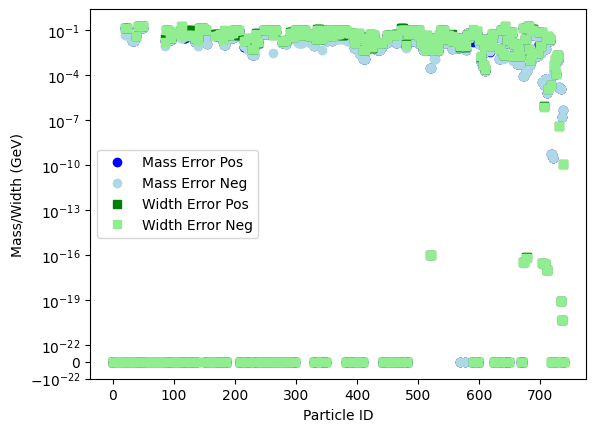

In [10]:
counter_mass = 0
for m_err in particles_df_errors["Mass Error Neg (GeV)"]:
    if m_err > 0:
        counter_mass += 1

counter_width = 0
for w_err in particles_df_errors["Width Error Neg (GeV)"]:
    if w_err > 0:
        counter_width += 1

print(f"Number of particles with positive mass error: {counter_mass}")
print(f"Number of particles with positive width error: {counter_width}")

plt.plot(particles_df_errors["Mass Error Pos (GeV)"], marker='o', linestyle='None', color="blue", label="Mass Error Pos")
plt.plot(particles_df_errors["Mass Error Neg (GeV)"], marker='o', linestyle='None', color="lightblue", label="Mass Error Neg")
plt.plot(particles_df_errors["Width Error Pos (GeV)"], marker='s', linestyle='None', color="green", label="Width Error Pos")
plt.plot(particles_df_errors["Width Error Neg (GeV)"], marker='s', linestyle='None', color="lightgreen", label="Width Error Neg")
plt.yscale("symlog", linthresh=1e-22)
plt.xlabel("Particle ID")
plt.ylabel("Mass/Width (GeV)")
plt.legend()
#plt.show()
plt.savefig("Plots/PDG-API/errors_plot.png", dpi=300, bbox_inches='tight')

In [11]:
# Save the DataFrame with errors to a pickle file
# particles_df_errors.to_pickle("Dataframes/particles_df_errors.pkl")

#df = pd.read_pickle('Dataframes/particles_df_errors.pkl')
#print(df.to_string())


### Decay Dataframe

In [12]:
# Output path
# output_path = f"decays_PDG2016Plus_massorder_err.dat"

# parser.parse_to_dat(output_path, particles_df_errors, decays_df)